# **Support Vector Machine(SVM) Assignment**

# **Assignment 17(a)**

# ***1.ForestFires dataset (forestfires.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [2]:
#importing dataset
forest=pd.read_csv('forestfires.csv')
forest.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

# **Exploratory Data Analysis**

In [3]:
forest.shape

(517, 31)

In [4]:
# checking missing values
(forest.isna().sum())/len(forest)*100

month            0.0
day              0.0
FFMC             0.0
DMC              0.0
DC               0.0
ISI              0.0
temp             0.0
RH               0.0
wind             0.0
rain             0.0
area             0.0
dayfri           0.0
daymon           0.0
daysat           0.0
daysun           0.0
daythu           0.0
daytue           0.0
daywed           0.0
monthapr         0.0
monthaug         0.0
monthdec         0.0
monthfeb         0.0
monthjan         0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay         0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category    0.0
dtype: float64

In [5]:
forest.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [6]:
#checking duplicates
forest.duplicated().sum()

8

In [7]:
forest[forest.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [8]:
#droping duplicates
forest.drop_duplicates(inplace=True)

In [9]:
forest.shape

(509, 31)

In [10]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean    90.618075  110.235756  547.787623    9.023576   18.865422   44.253438   
std      5.555527   63.804112  248.196222    4.585083    5.841083   16.365192   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   62.300000  437.700000    6.400000   15.400000   32.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  141.300000  713.900000   11.000000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  509.000000  509.000000   509.000000  509.000000  ...  509.000000   
mean     4.011395    0.020432    12.992908    0.163065  ...    0.017682   
std      1.800926    0.296261    64.133357    0.369788  ...    0.131921   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.610000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.580000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     0.039293    0.003929    0.062868    0.031434    0.104126    0.003929   
std      0.194482    0.062622    0.242965    0.174660    0.305724    0.062622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  509.000000  509.000000  509.000000  
mean     0.001965    0.029470    0.337917  
std      0.044324    0.169285    0.473466  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [12]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [13]:
#Analysis

In [14]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [15]:
forest.head(3)

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  

[3 rows x 31 columns]

In [16]:
forest['size_category'].unique()

array(['small', 'large'], dtype=object)

In [17]:
forest.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

# **Correlation**

In [18]:
#correlation
forest.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC       0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC        0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI       0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp      0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH       -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind     -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain      0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area      0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri    0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon   -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat   -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun   -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu    0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue    0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed    0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug  0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul  0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep  0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.030409  0.052280  0.040998  0.020889  ... -0.136614 -0.281054   
DMC      -0.104563  0.071017  0.076932 -0.011152  ... -0.177044 -0.319691   
DC       -0.202856  0.033772  0.051542 -0.001642  ... -0.106347 -0.402201   
ISI       0.104834  0.062132  0.008429  0.051599  ... -0.162761 -0.250494   
temp     -0.227754  0.067911  0.099173 -0.077766  ... -0.329774 -0.319901   
RH        0.070721  0.094343 -0.074554  0.069599  ... -0.047670  0.141593   
wind      1.000000  0.059332  0.012623  0.121056  ...  0.270919 -0.028820   
rain      0.059332  1.000000 -0.006511 -0.001723  ... -0.009262 -0.013961   
area      0.012623 -0.006511  1.000000 -0.052390  ...  0.000706 -0.021205   
dayfri    0.121056 -0.001723 -0.052390  1.000000  ... -0.018868  0.047592   
daymon   -0.062712 -0.028473 -0.022178 -0.182056  ...  0.113829  0.002649   
daysat   -0.068421 -0.030252  0.087647 -0.193432  ... -0.058793  0.021400   
daysun    0.025971 -0.015749 -0.020657 -0.210075  ... -0.025435  0.007987   
daythu   -0.055820 -0.025236  0.020685 -0.161357  ... -0.002816 -0.042571   
daytue    0.052331  0.127243 -0.001002 -0.165896  ... -0.005158 -0.014599   
daywed   -0.022181 -0.019189 -0.011046 -0.150484  ...  0.003068 -0.035839   
monthapr  0.048864 -0.009262 -0.008589 -0.018868  ... -0.018000 -0.027133   
monthaug  0.027413  0.088572 -0.000948 -0.100652  ... -0.098386 -0.148305   
monthdec  0.270919 -0.009262  0.000706 -0.018868  ...  1.000000 -0.027133   
monthfeb -0.028820 -0.013961 -0.021205  0.047592  ... -0.027133  1.000000   
monthjan -0.070217 -0.004336 -0.012737 -0.027723  ... -0.008427 -0.012702   
monthjul -0.039880 -0.012411  0.005566 -0.048598  ... -0.034750 -0.052381   
monthjun  0.010124 -0.012437 -0.019083 -0.018562  ... -0.024170 -0.036433   
monthmar  0.181610 -0.019189 -0.048394  0.041050  ... -0.045740 -0.068947   


# **Visualization**

# **HeatMap**

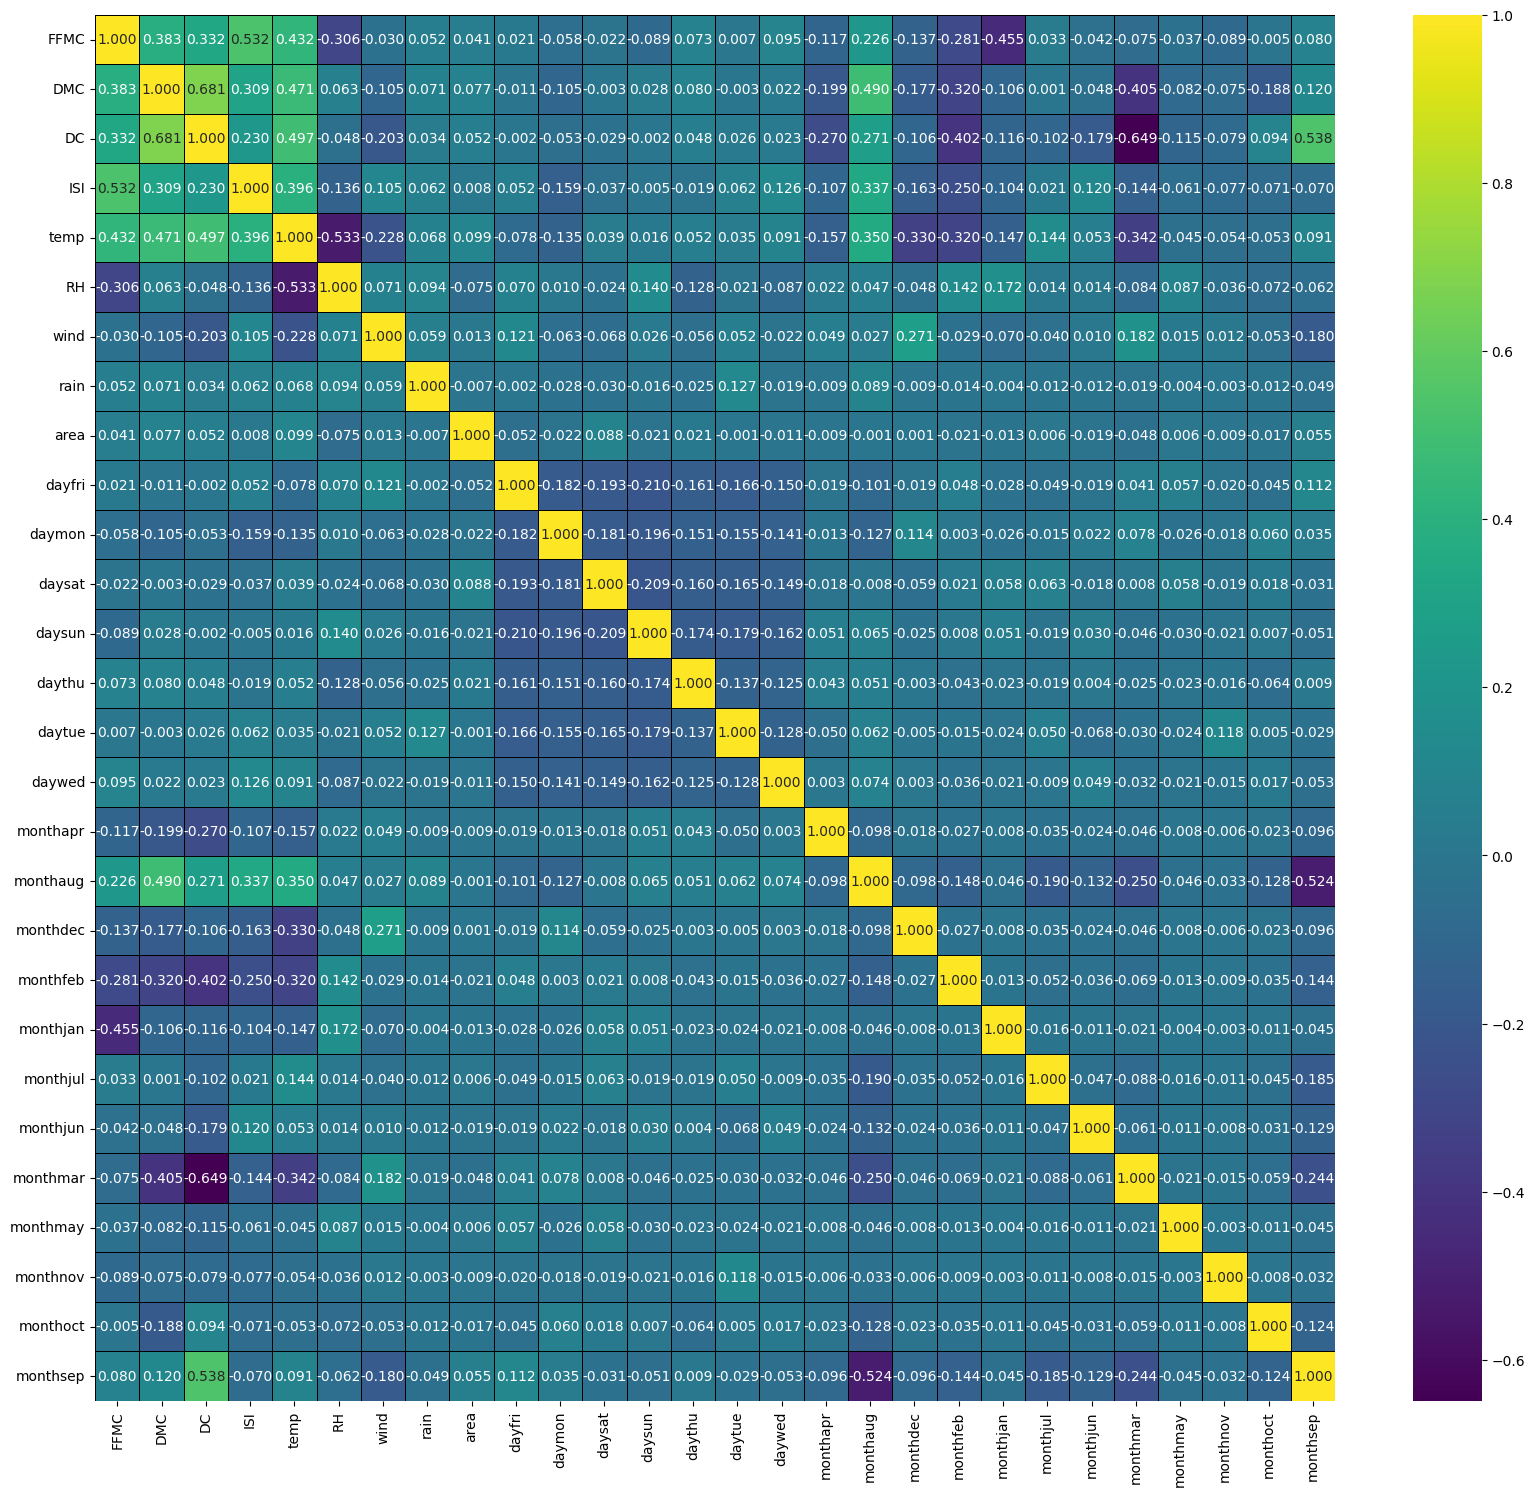

In [19]:
#heat map
plt.figure(figsize=(20,18))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',fmt='.3f',linewidth=0.5,linecolor='black')
plt.show()

# **PairPlot**

<Figure size 1200x900 with 0 Axes>

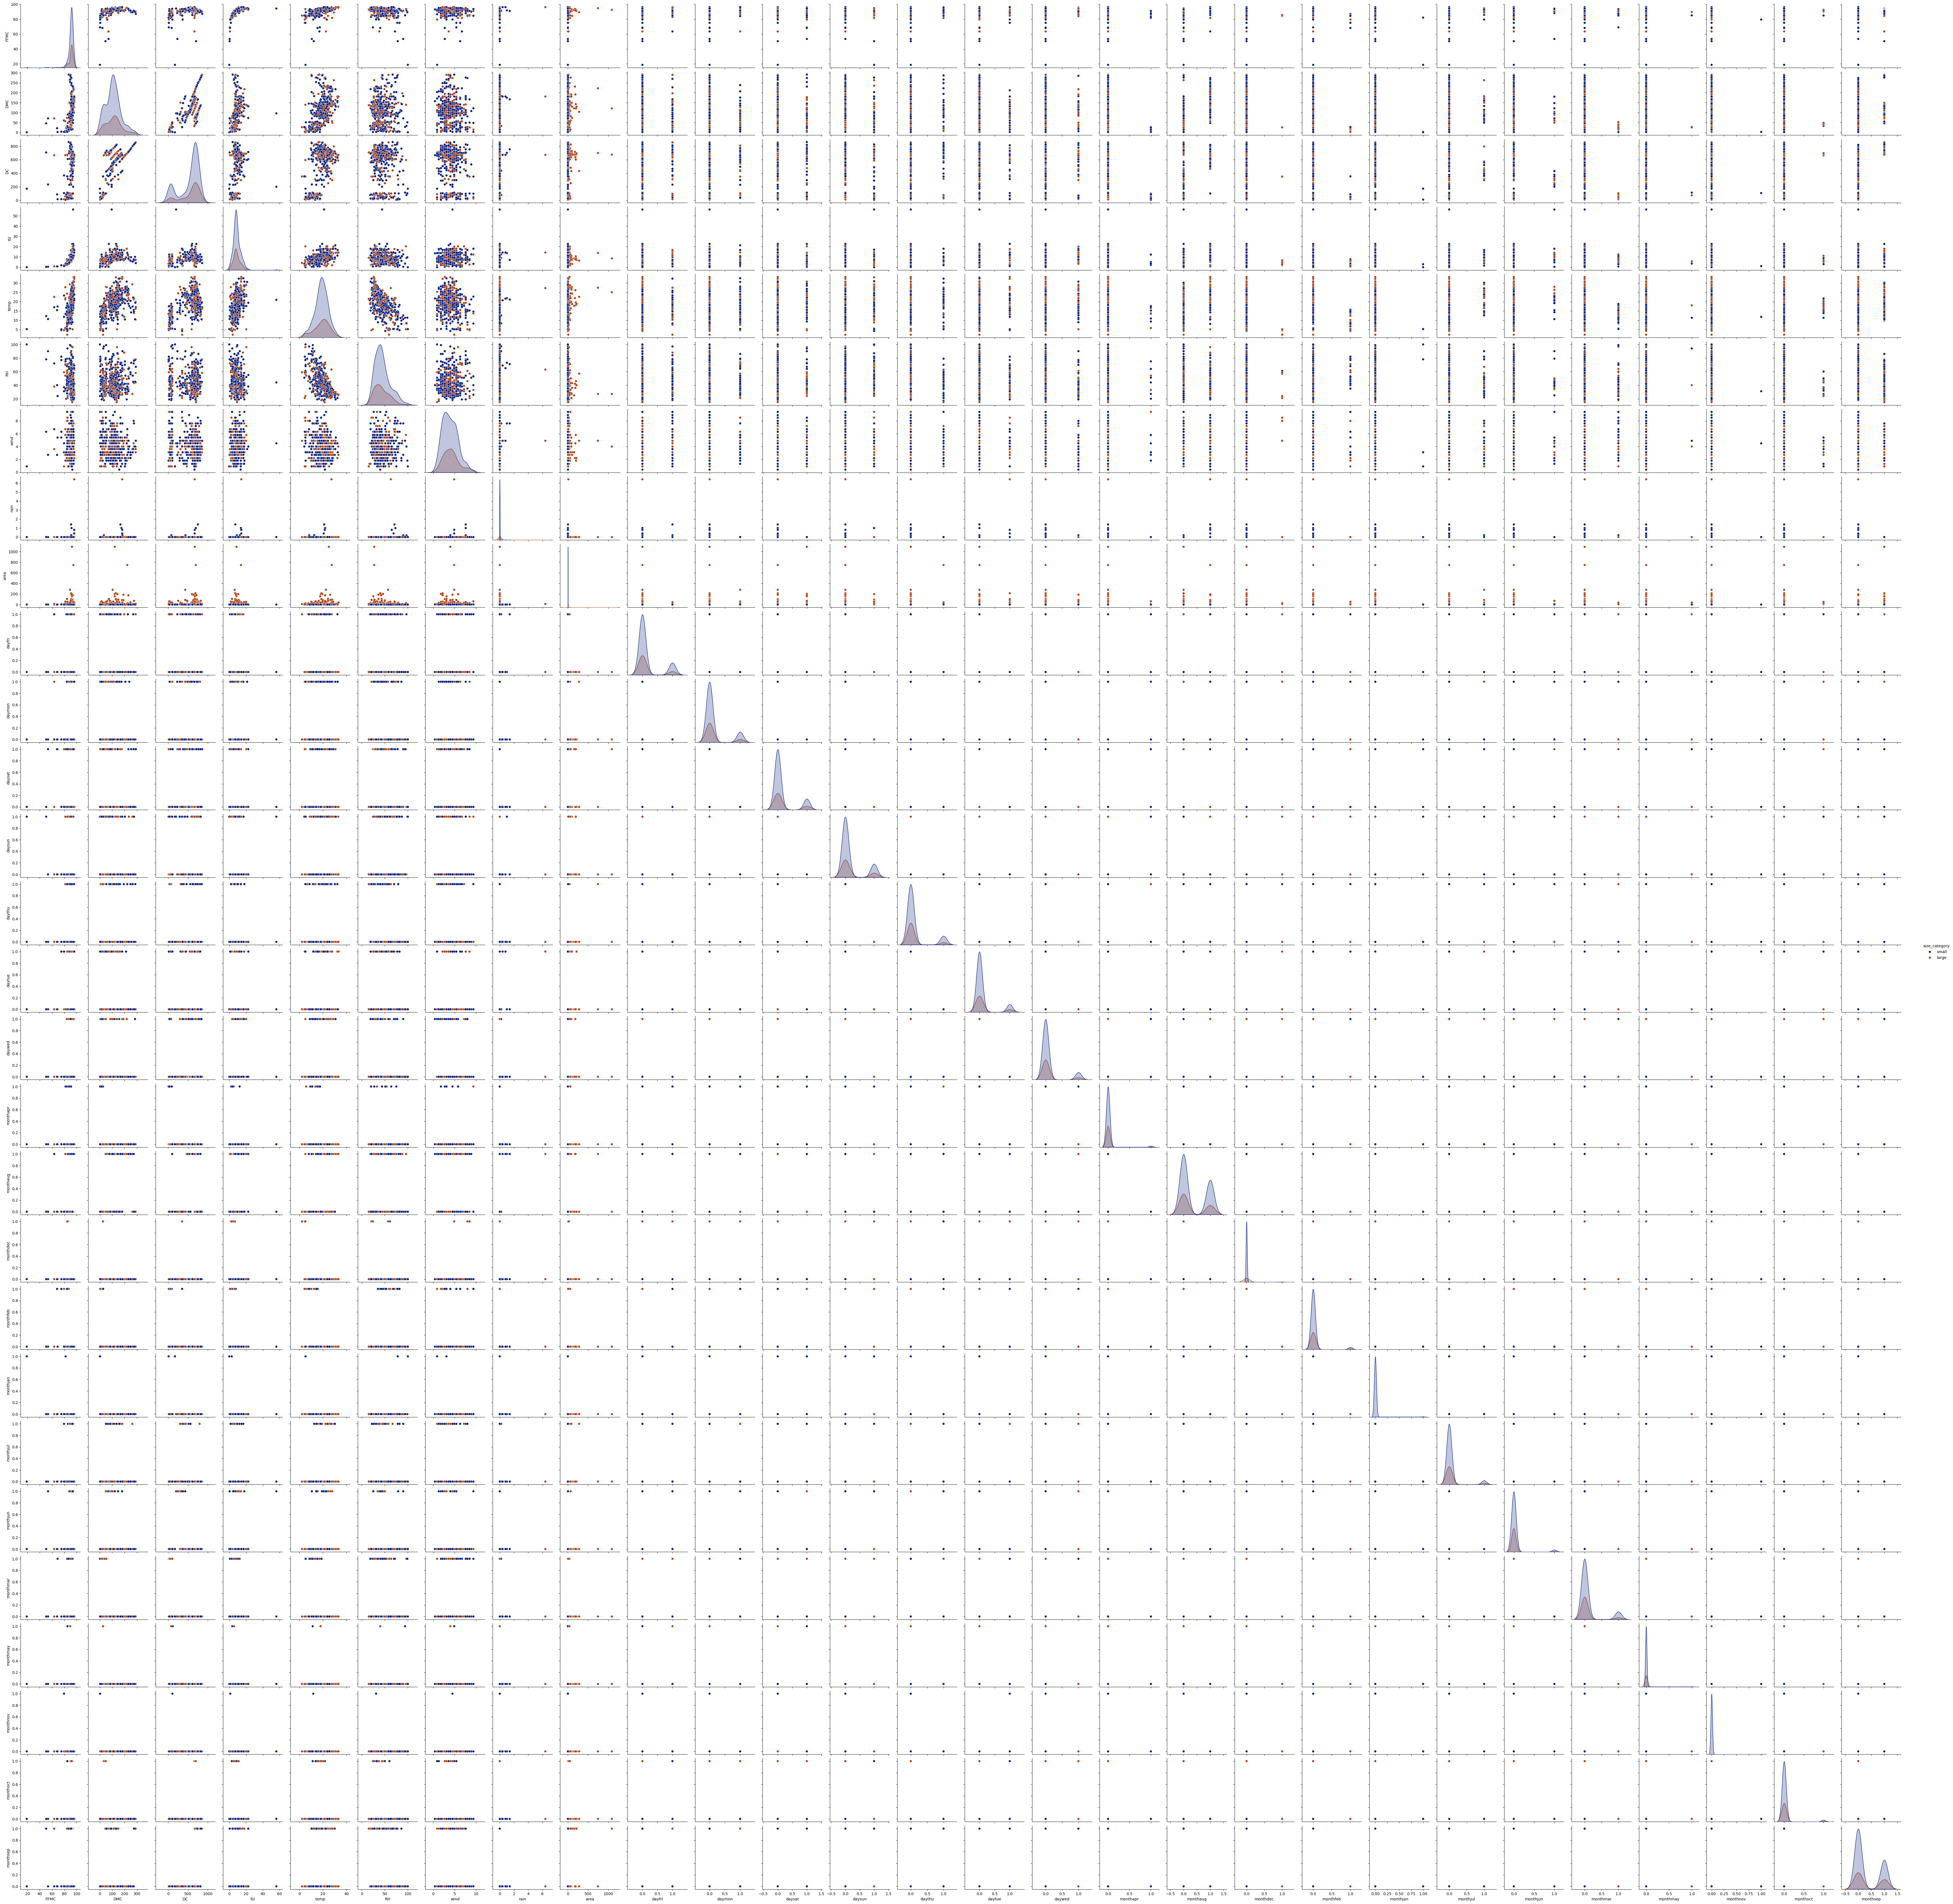

In [20]:
#pairplot
plt.figure(figsize=(12,9))
sns.pairplot(forest,hue='size_category',palette='dark')
plt.show()

# **Density Plot**

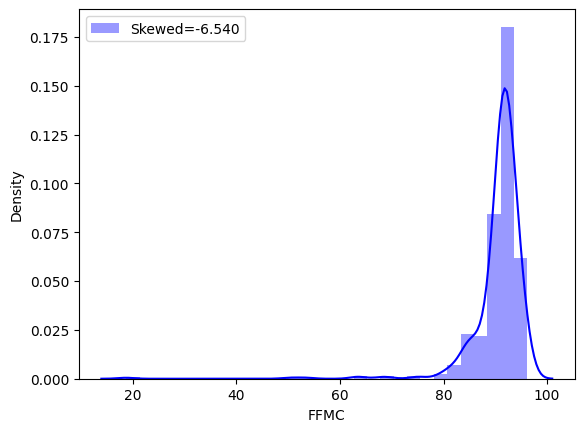

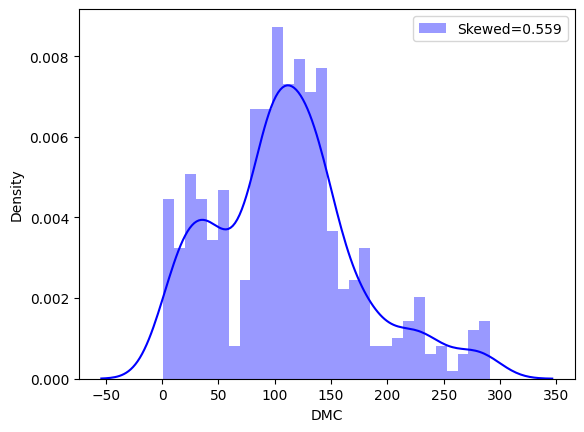

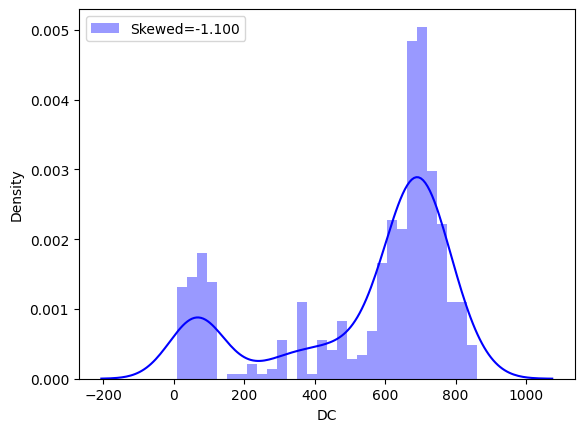

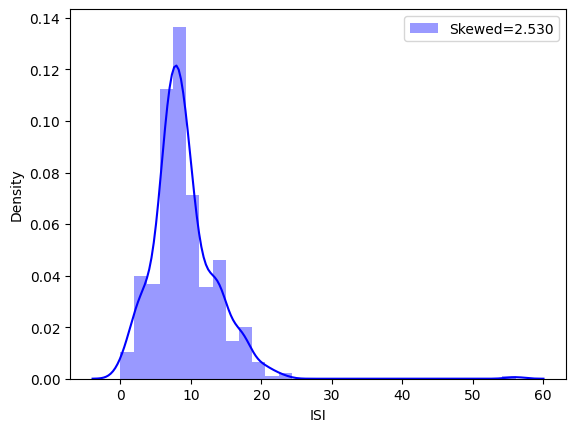

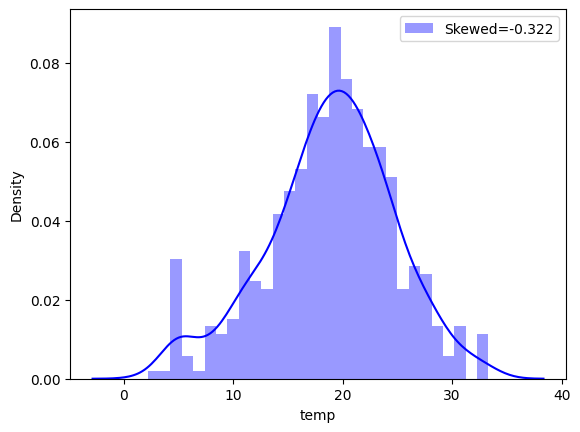

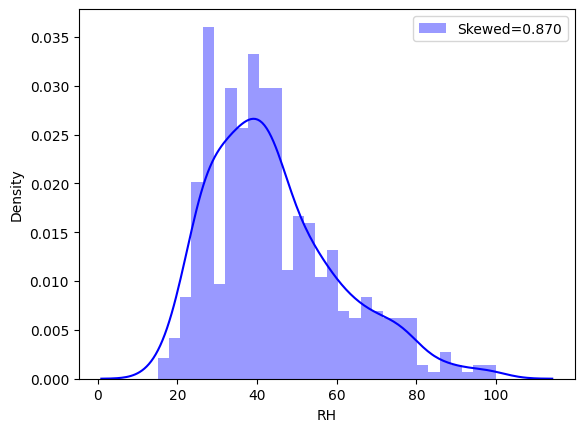

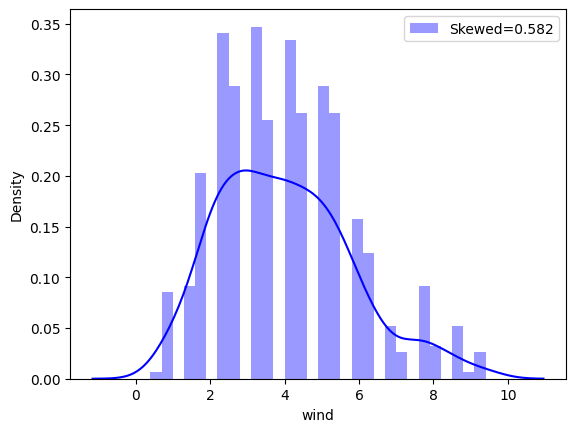

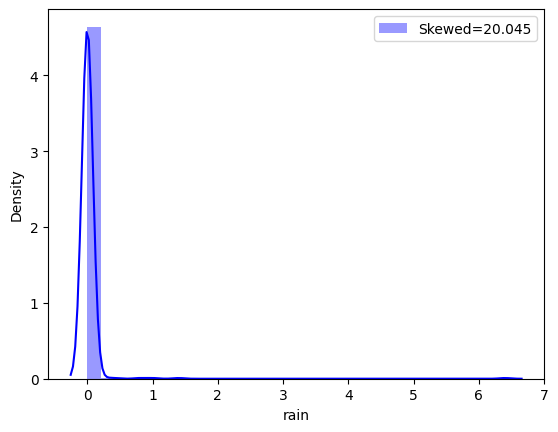

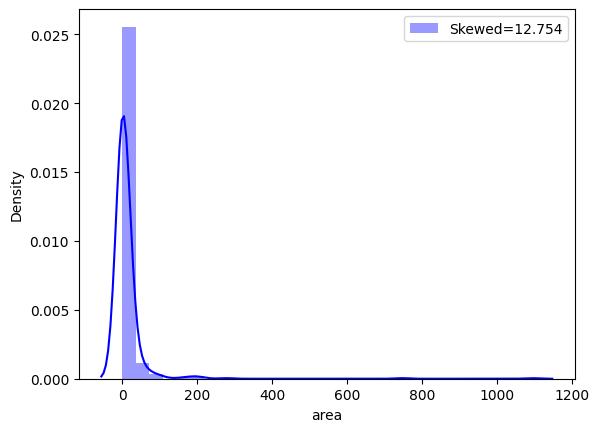

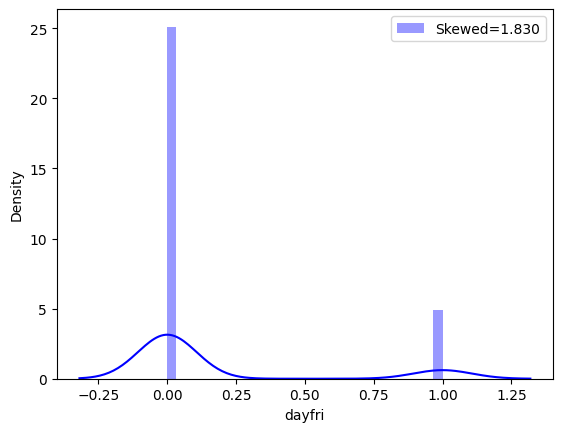

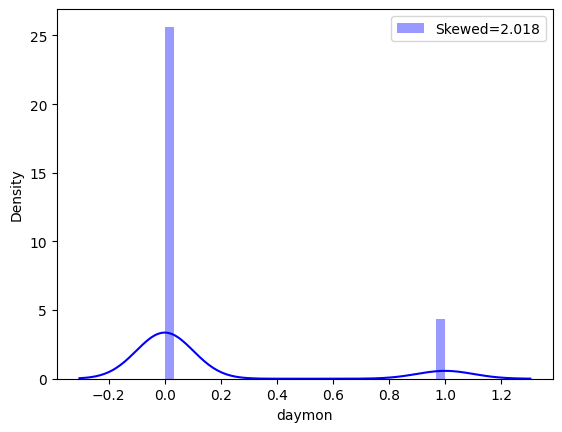

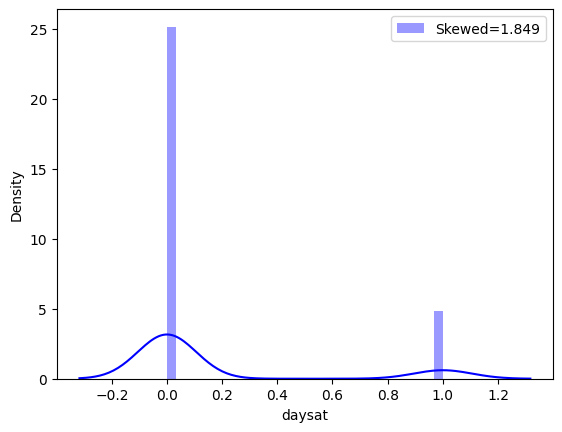

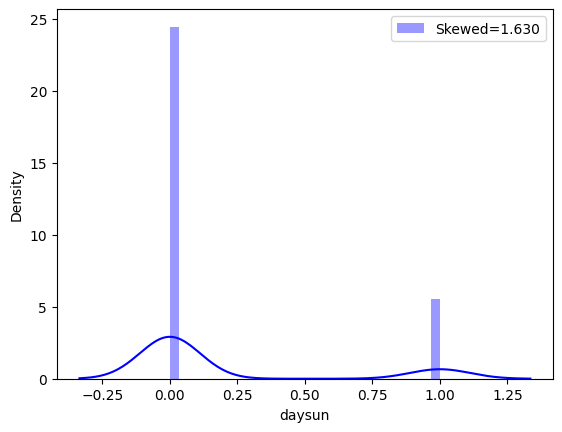

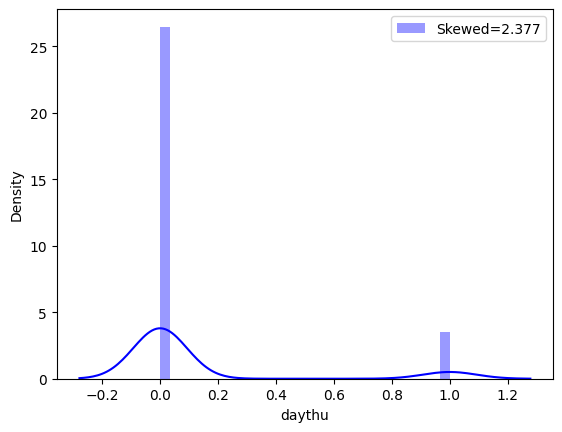

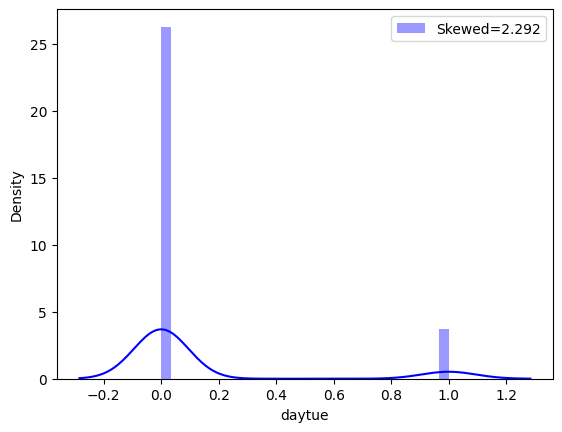

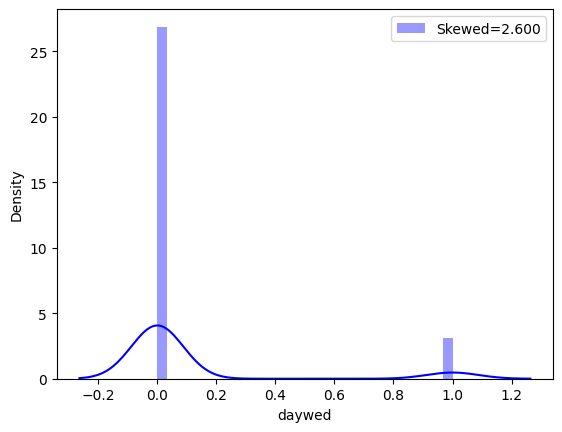

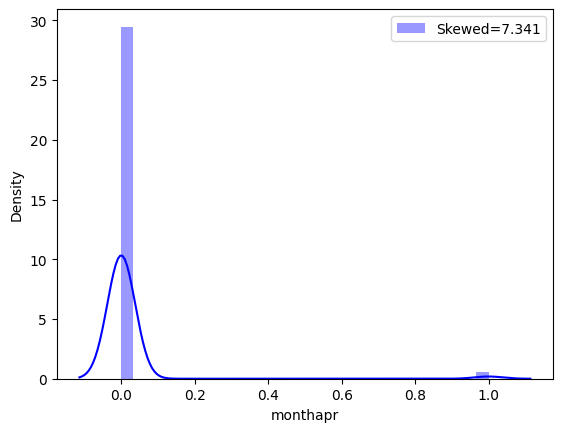

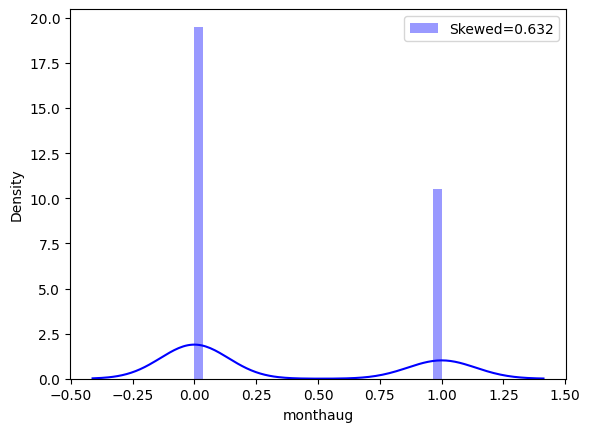

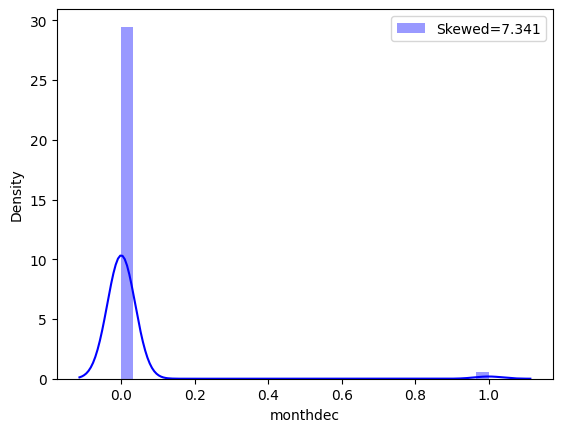

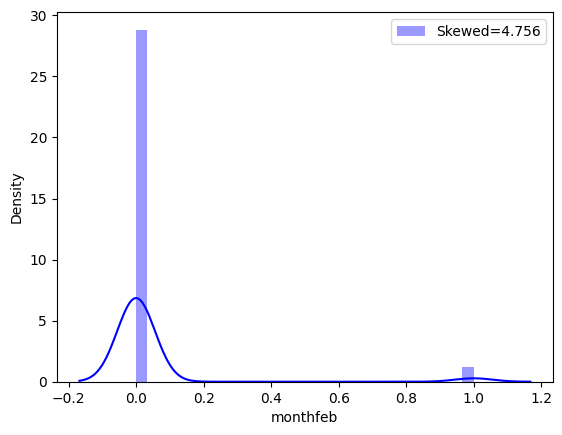

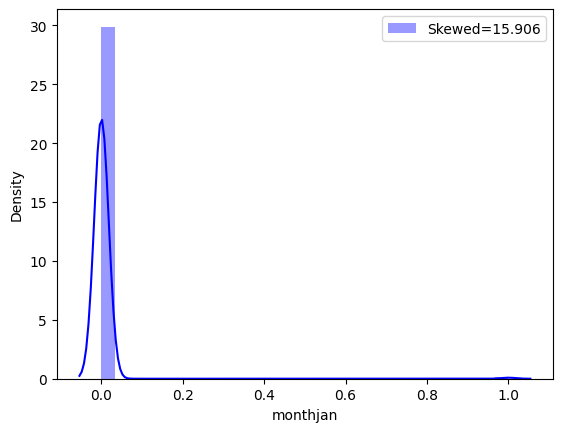

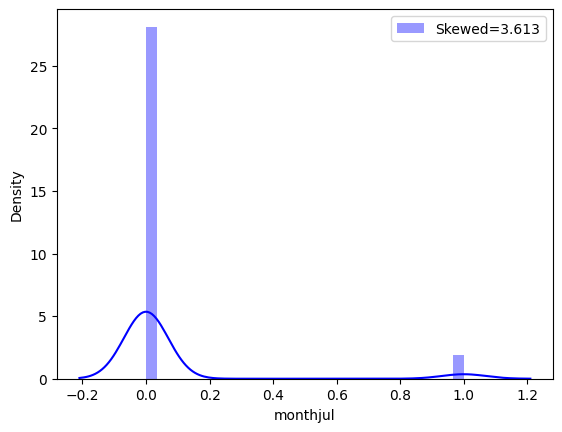

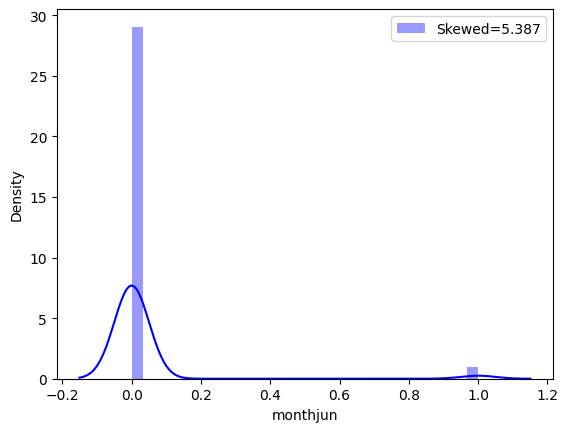

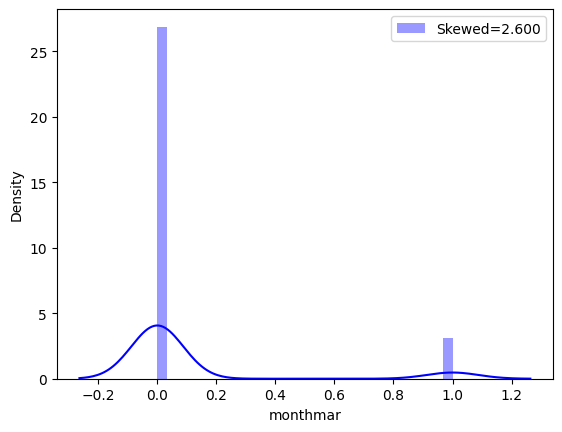

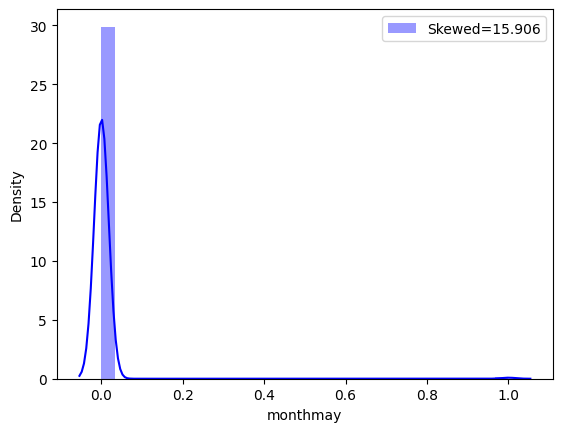

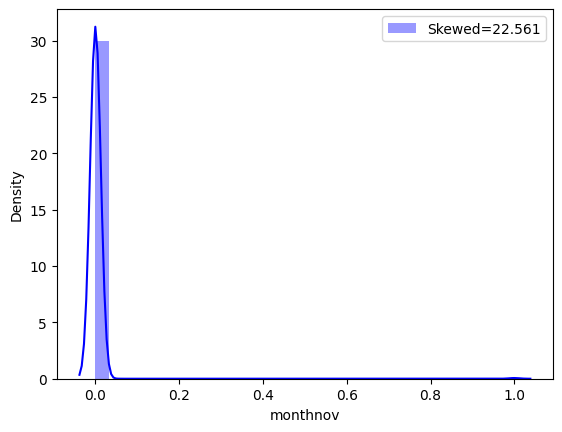

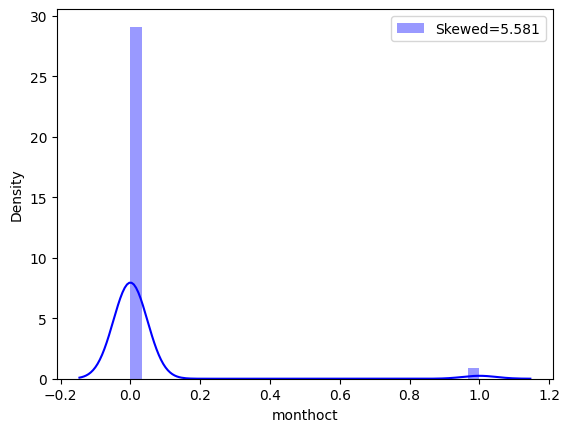

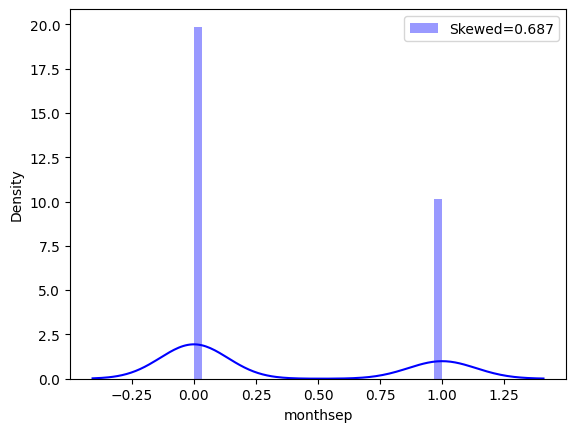

In [21]:
#univariate
feat=forest.iloc[:,2:-1]
for f in feat:
  skew=forest[f].skew()
  sns.distplot(forest[f],label='Skewed=%.3f'%(skew),bins=30,color='blue')
  plt.legend()
  plt.show()

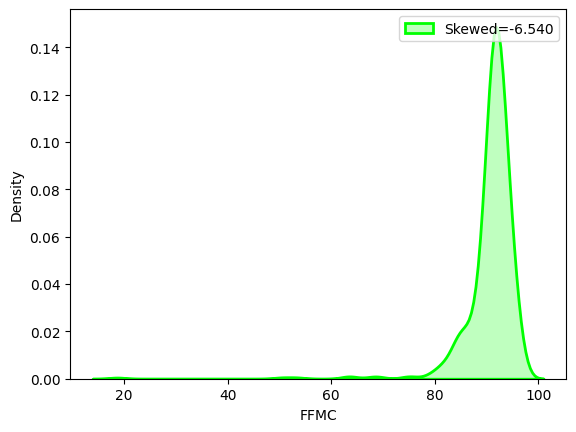

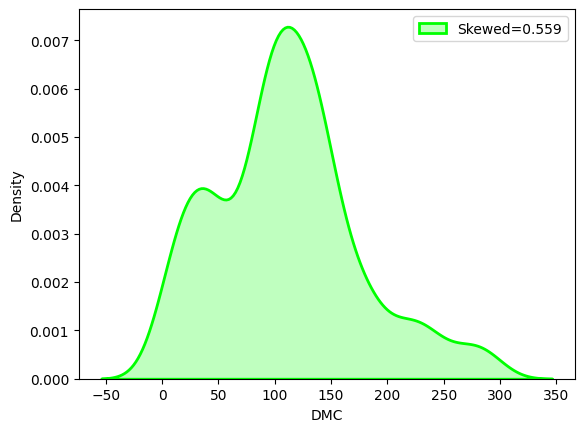

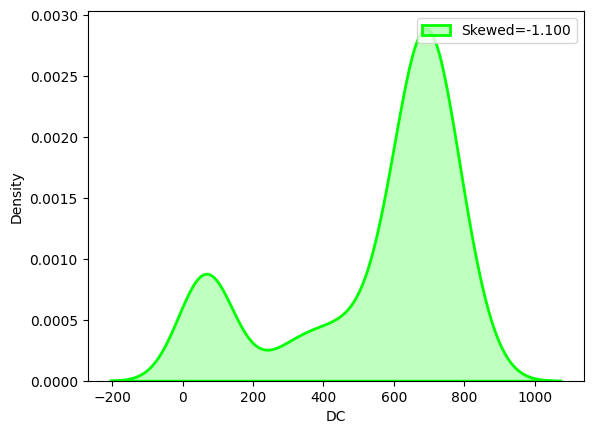

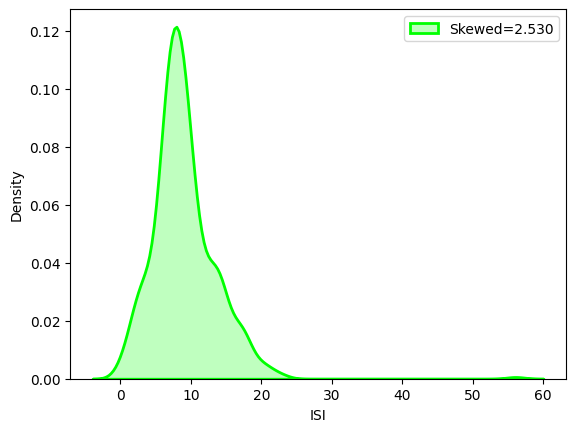

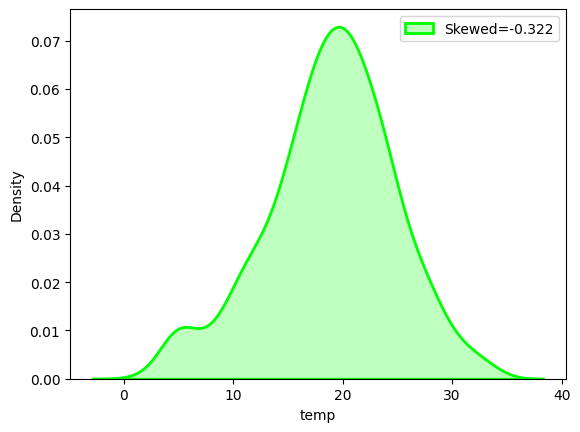

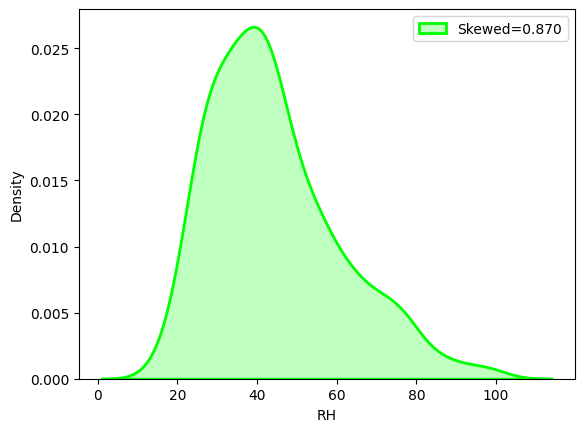

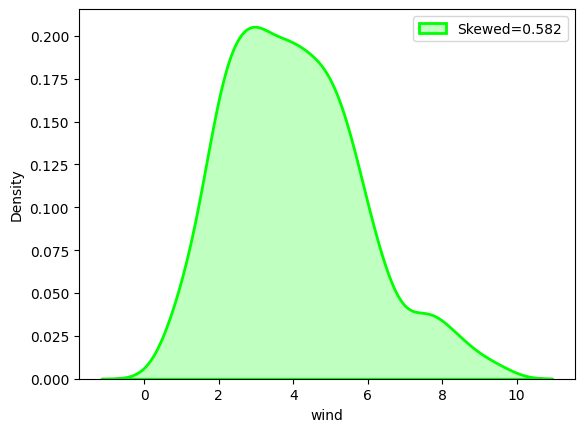

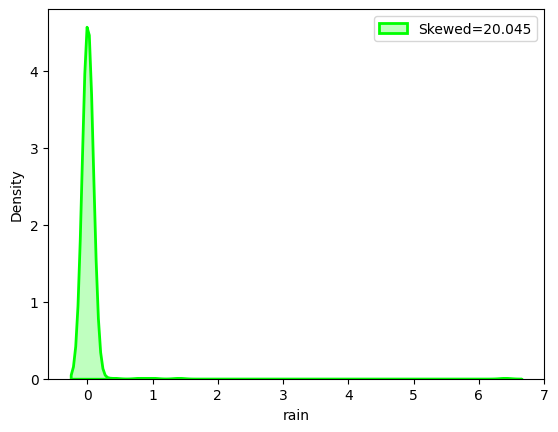

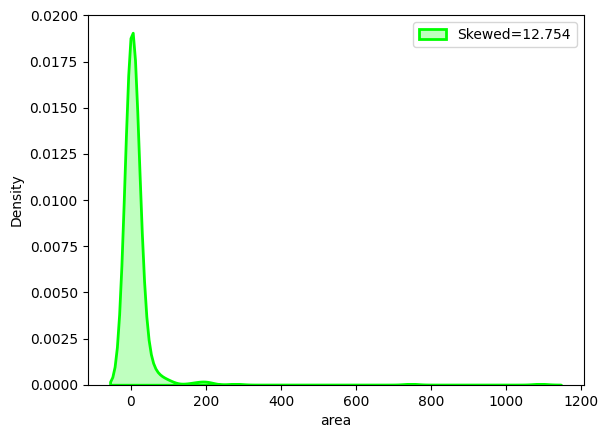

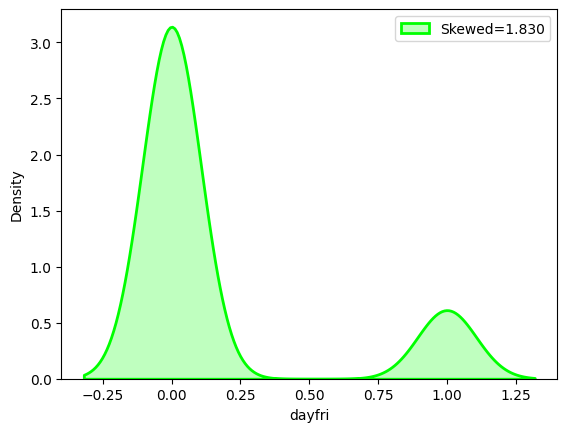

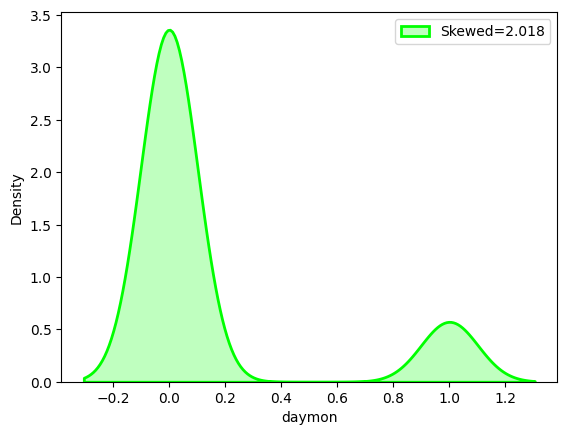

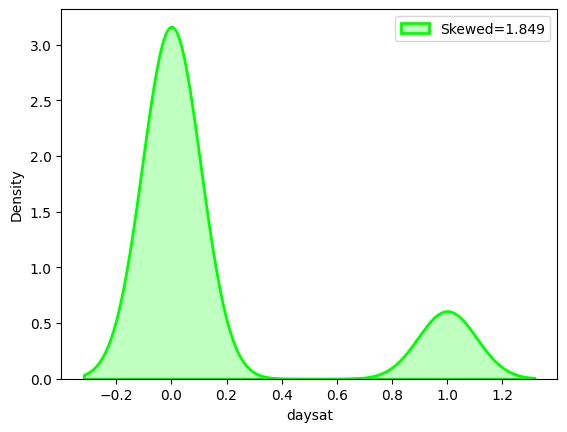

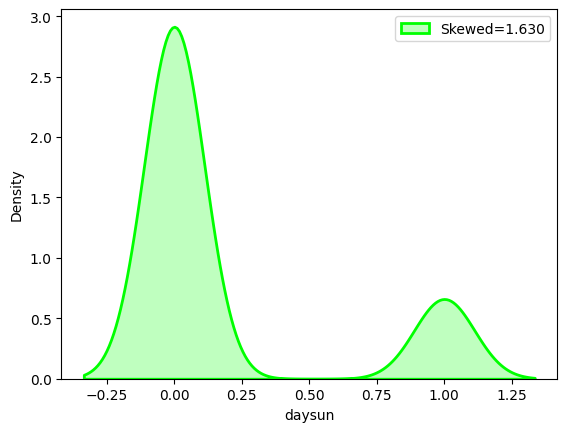

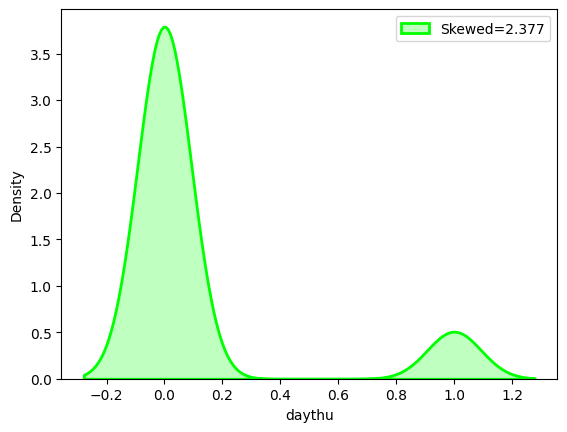

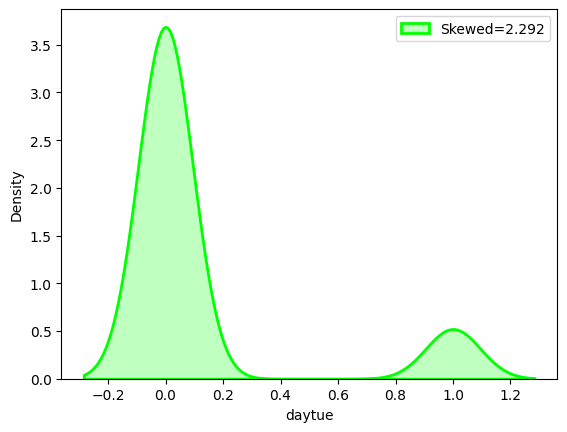

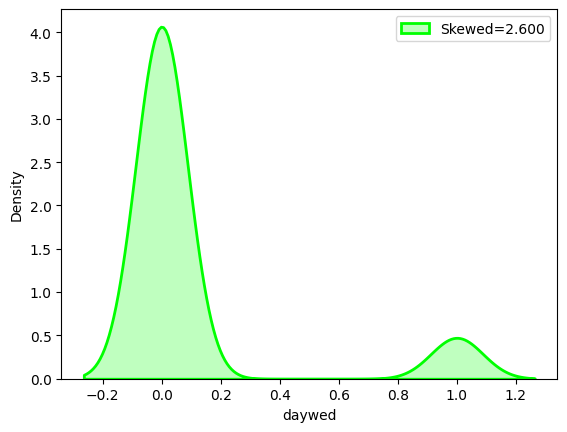

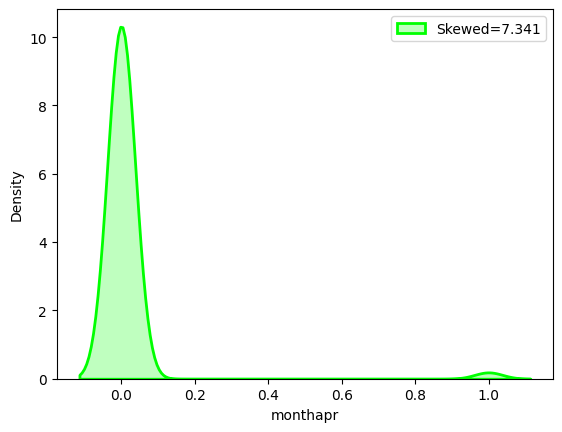

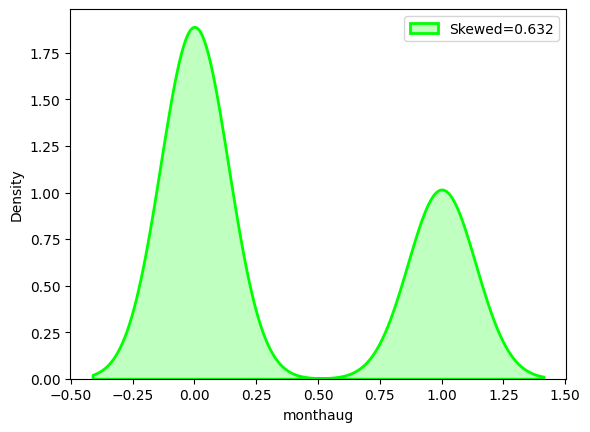

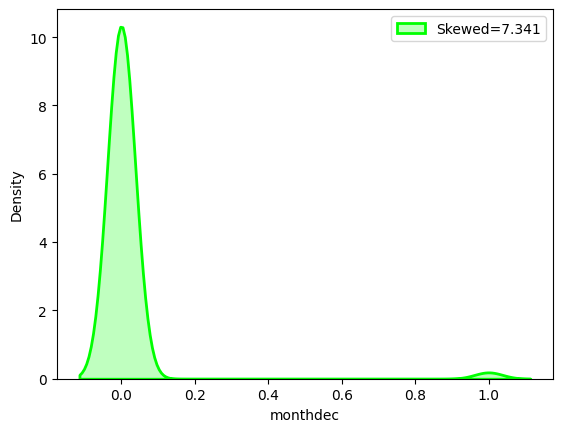

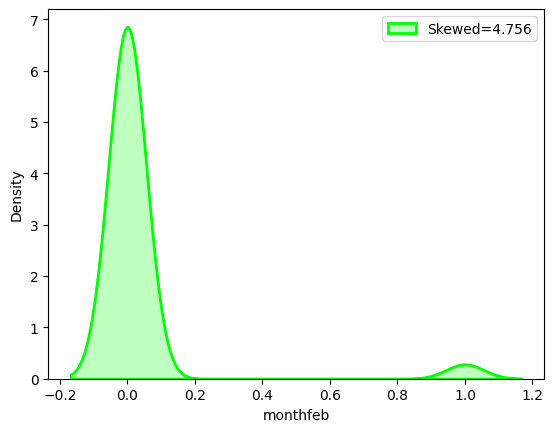

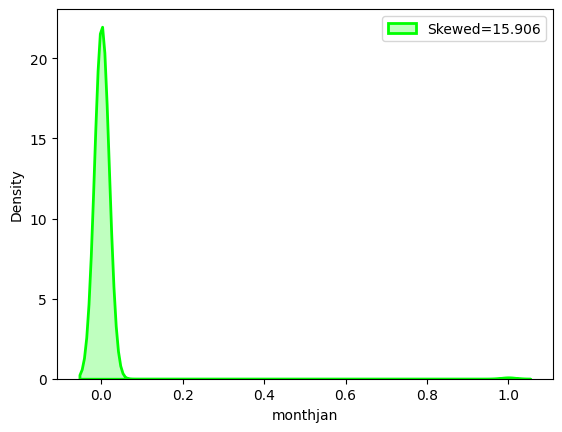

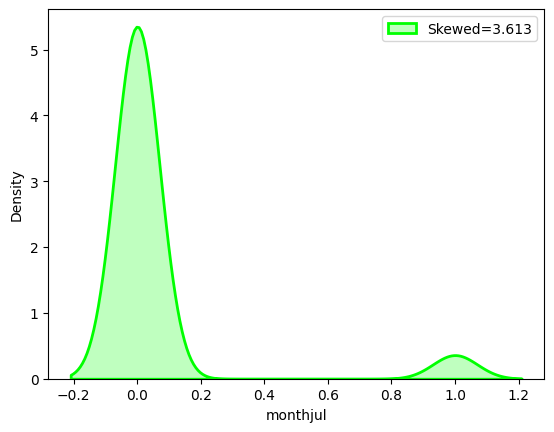

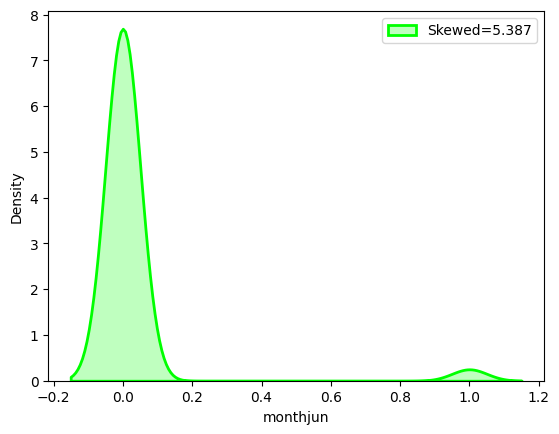

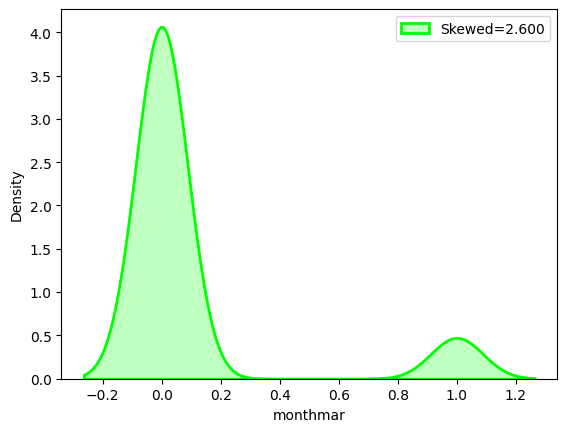

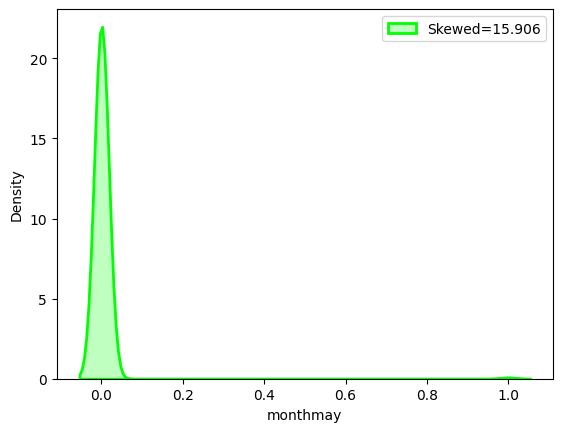

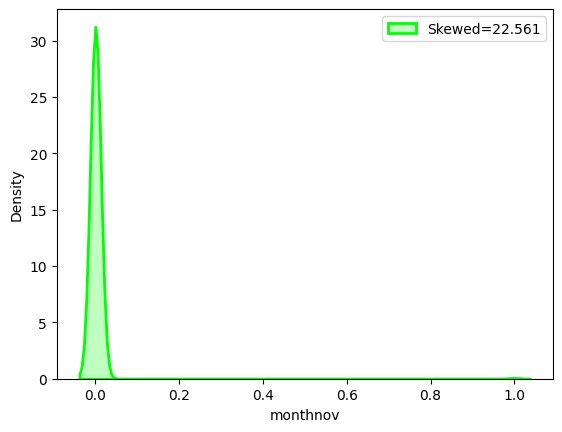

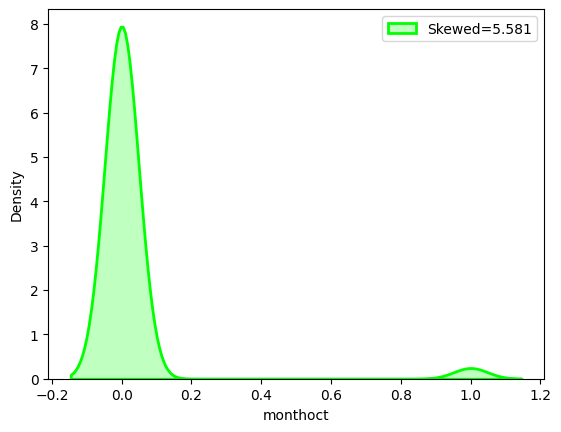

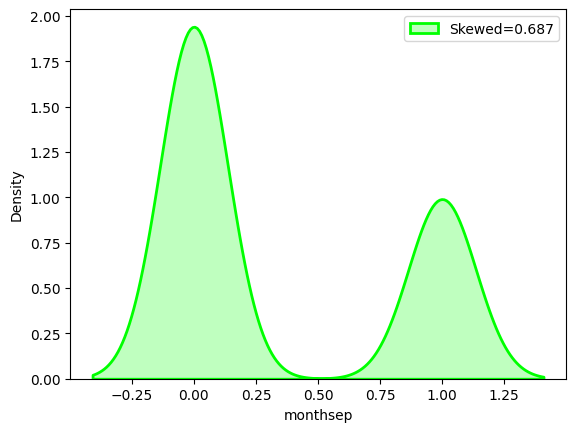

In [22]:
#kdeplot
feat=forest.iloc[:,2:-1]
for f in feat:
  skew=forest[f].skew()
  sns.kdeplot(forest[f],label='Skewed=%.3f'%(skew),color='lime',linewidth=2,shade=True)
  plt.legend()
  plt.show()

# **Boxplot**

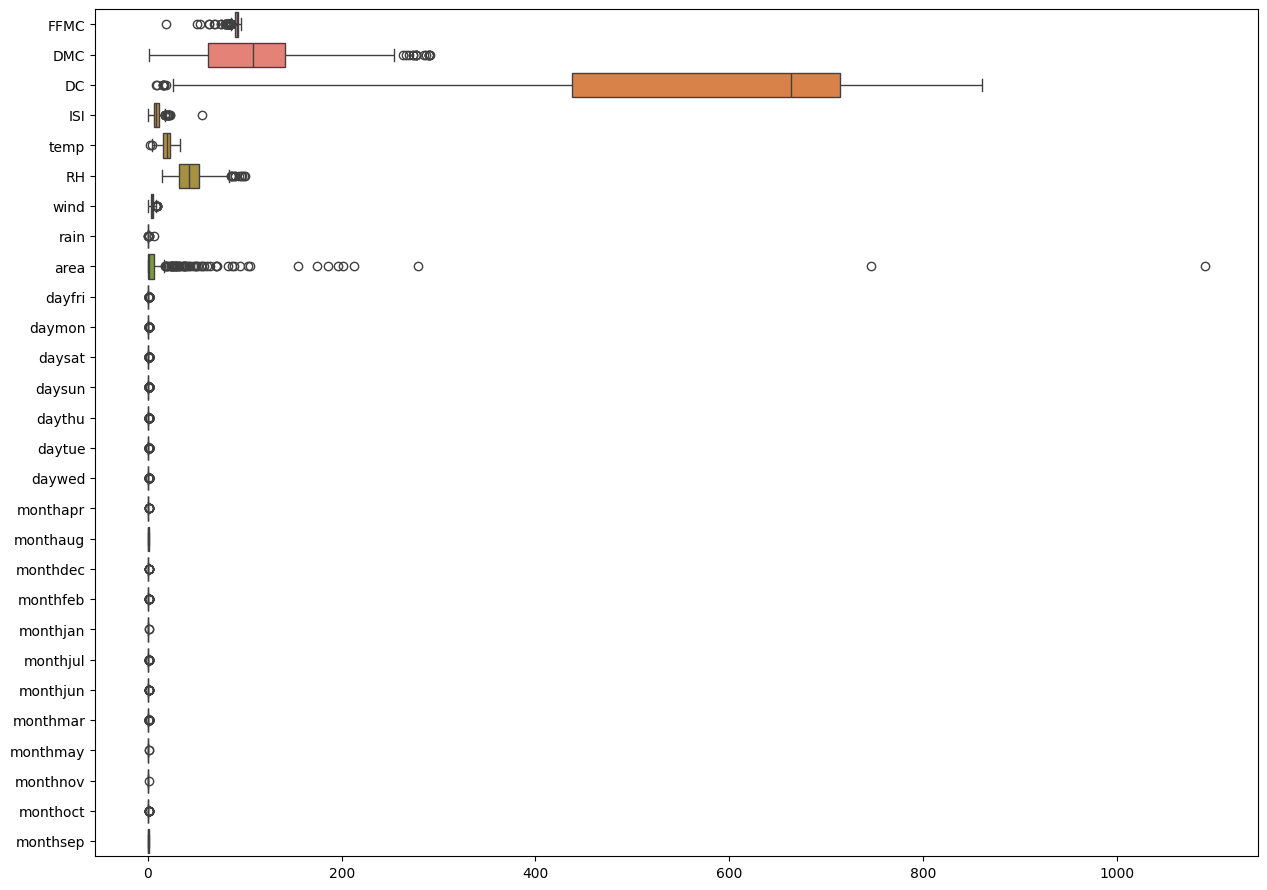

In [23]:
#boxplot
plt.figure(figsize=(15,11))
sns.boxplot(forest,orient='h')
plt.show()

# **Histogram**

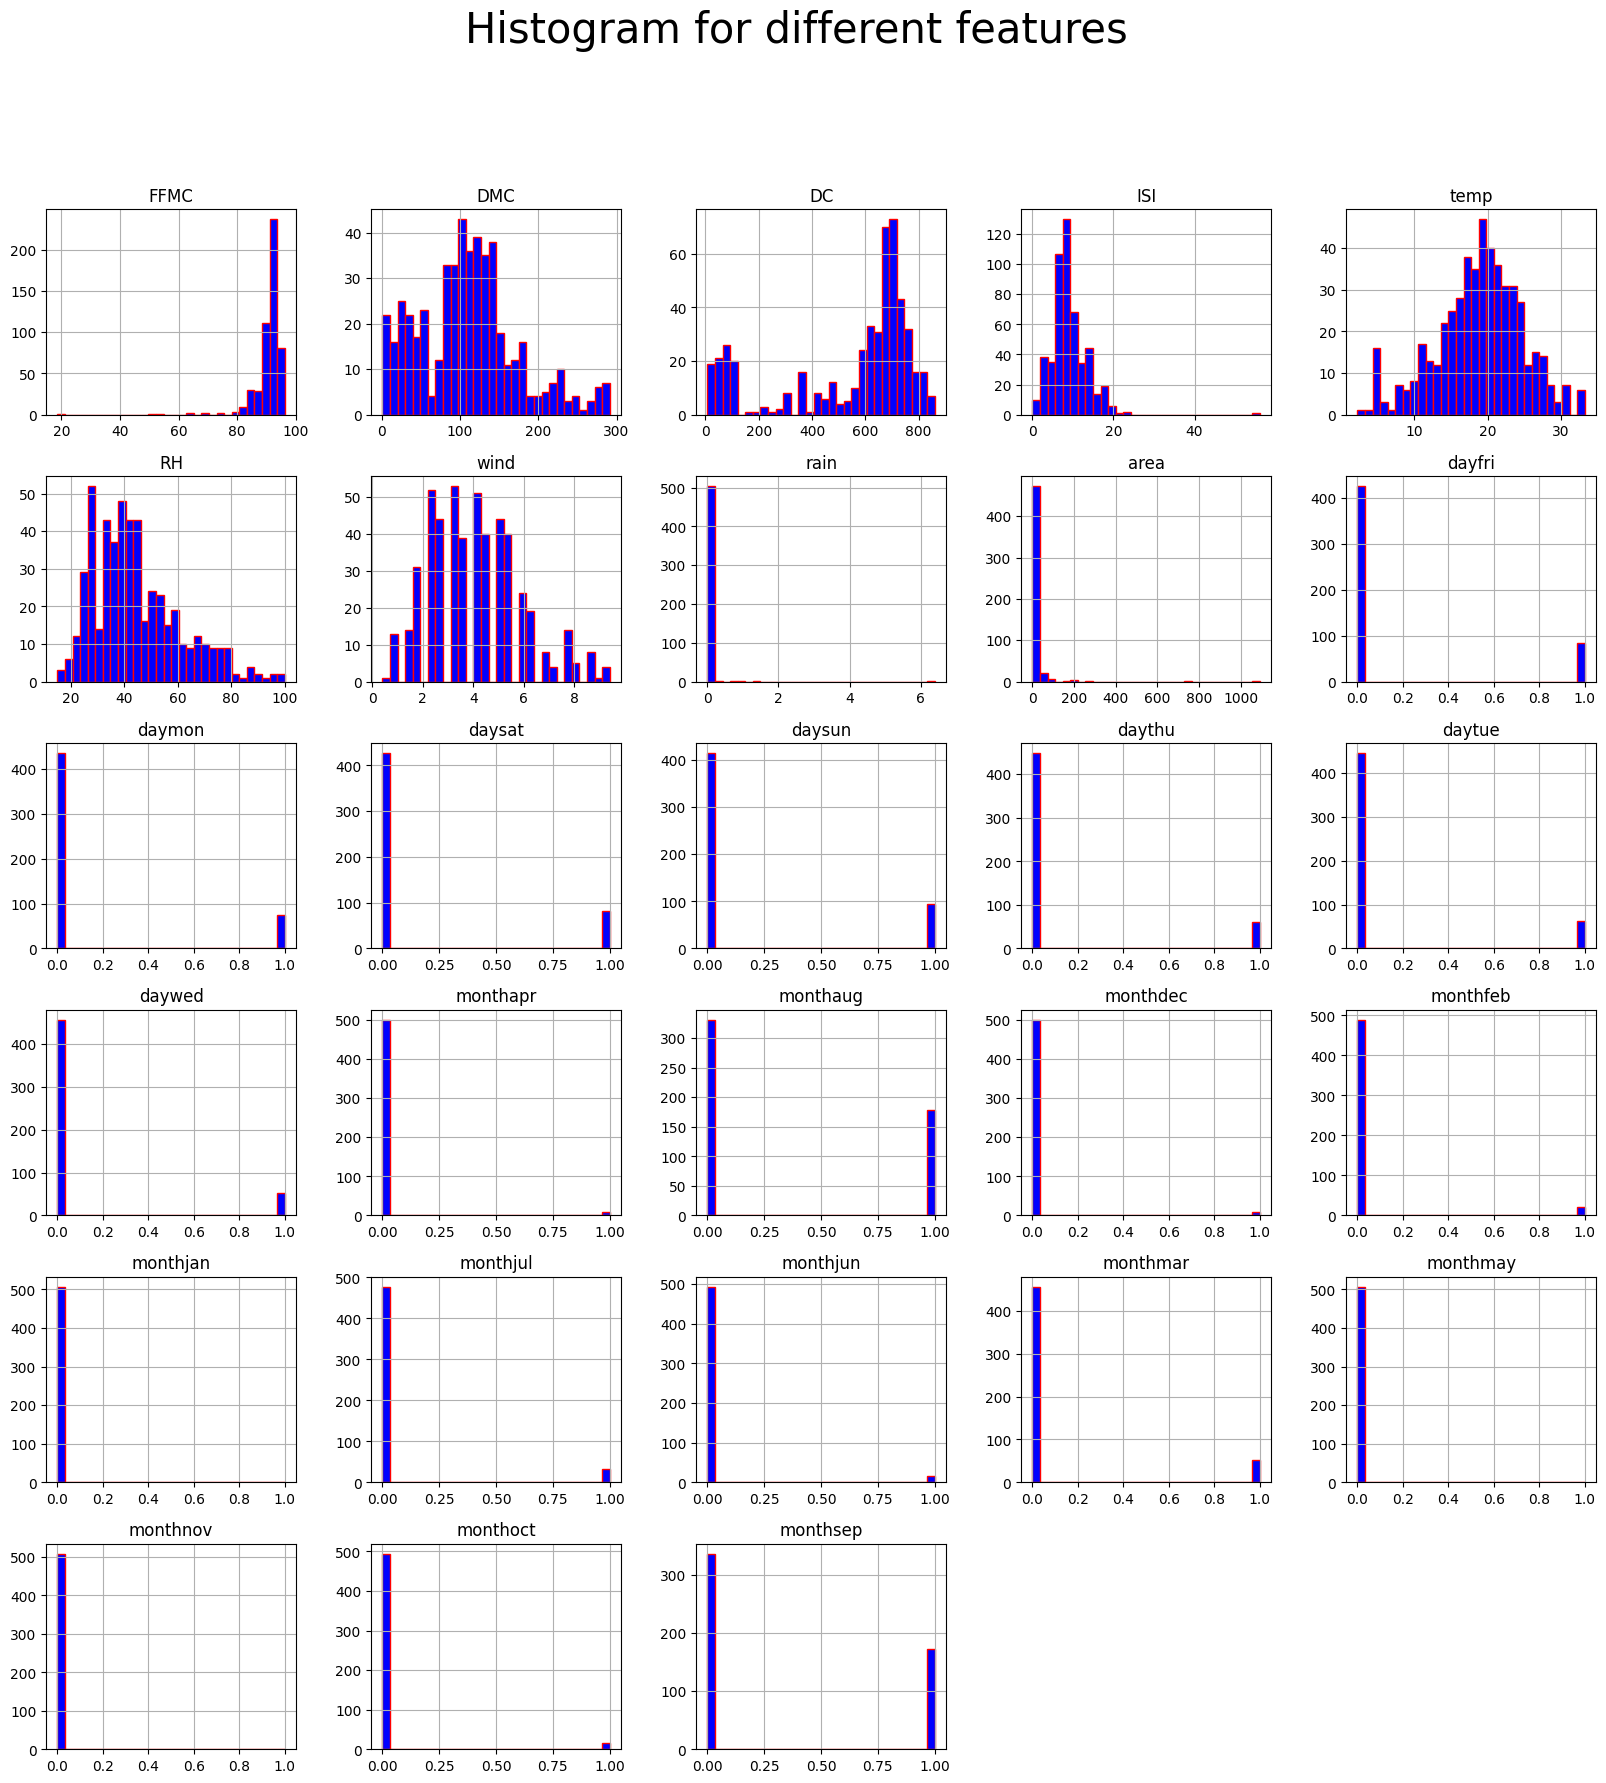

In [24]:
#histogram for different features
forest.hist(bins=30,figsize=(20,20),color='blue',rwidth=1,edgecolor='red')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

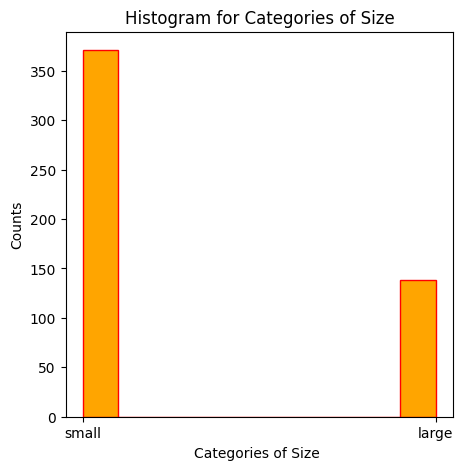

In [25]:
#histplot for size category
plt.figure(figsize=(5,5))
plt.hist(forest['size_category'],color='orange',rwidth=1,edgecolor='red')
plt.xlabel('Categories of Size ')
plt.ylabel('Counts')
plt.title('Histogram for Categories of Size')
plt.show()

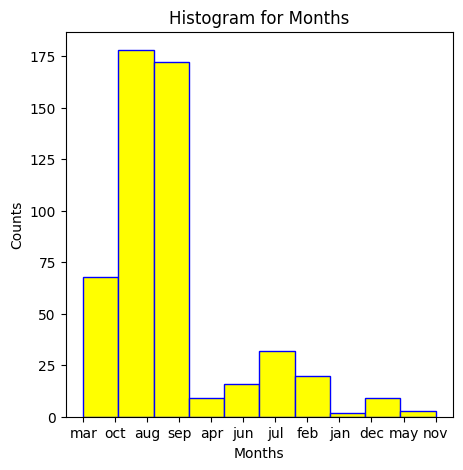

In [26]:
#histogram for months
plt.figure(figsize=(5,5))
plt.hist(forest['month'],color='yellow',rwidth=1,edgecolor='blue')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Histogram for Months')
plt.show()

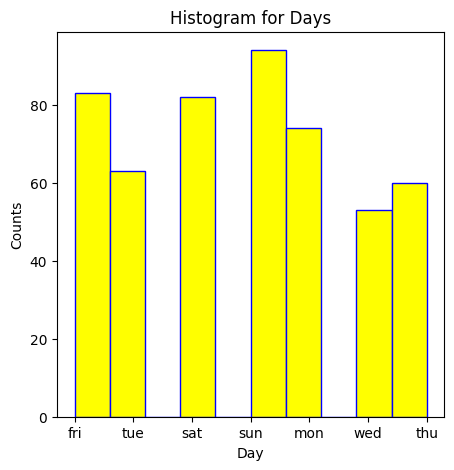

In [27]:
#histogram for Days
plt.figure(figsize=(5,5))
plt.hist(forest['day'],color='yellow',rwidth=1,edgecolor='blue')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.title('Histogram for Days')
plt.show()

# **Pie Chart**

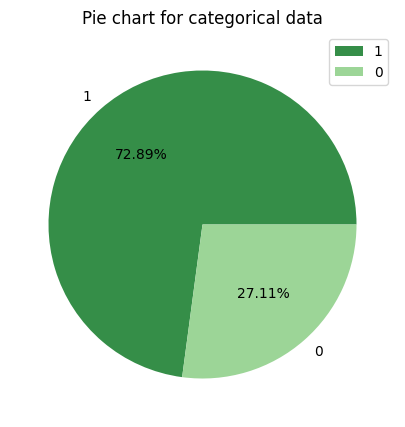

In [98]:
#pie chart
plt.figure(figsize=(9,5))
color=sns.color_palette('PRGn_r')
plt.pie(forest['size_category'].value_counts(),labels=forest['size_category'].unique(),autopct='%.2f%%',colors=color)
plt.legend()
plt.title("Pie chart for categorical data")
plt.show()

# **Plot for BiVariate Analysis**

Text(0, 0.5, 'size')

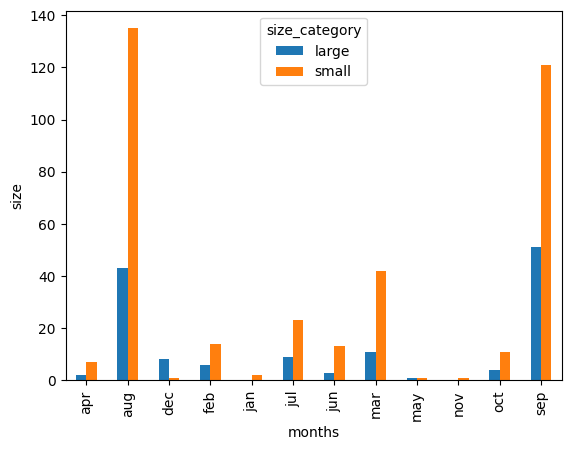

In [29]:
#Bar Plot
#relationship between month and size_category
pd.crosstab(forest['month'],forest['size_category']).plot(kind='bar')
plt.xlabel('months')
plt.ylabel('size')

Text(0, 0.5, 'size')

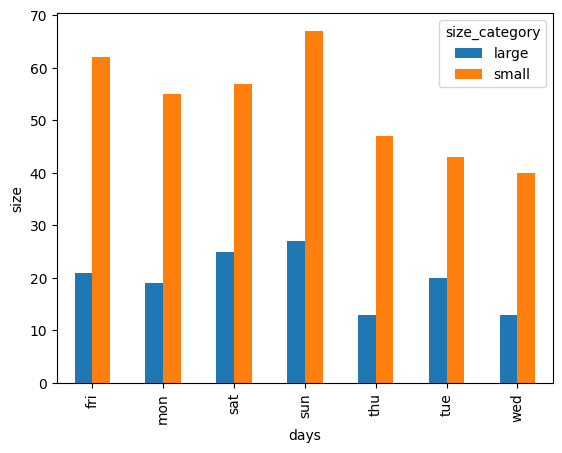

In [30]:
#Bar Plot
#relation between day and size
pd.crosstab(forest['day'],forest['size_category']).plot(kind='bar')
plt.xlabel('days')
plt.ylabel('size')

# **Plot for Univariate Analysis**

Text(0.5, 1.0, 'Months')

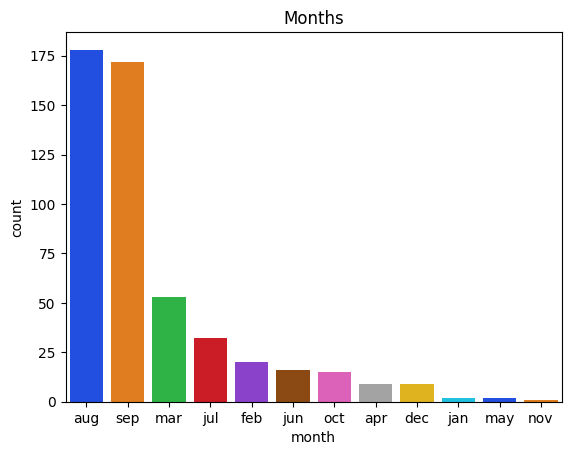

In [31]:
#Bar for month feature
sns.countplot(x='month',data=forest,palette='bright',order=forest['month'].value_counts().index)
plt.title('Months')

Text(0.5, 1.0, 'Days')

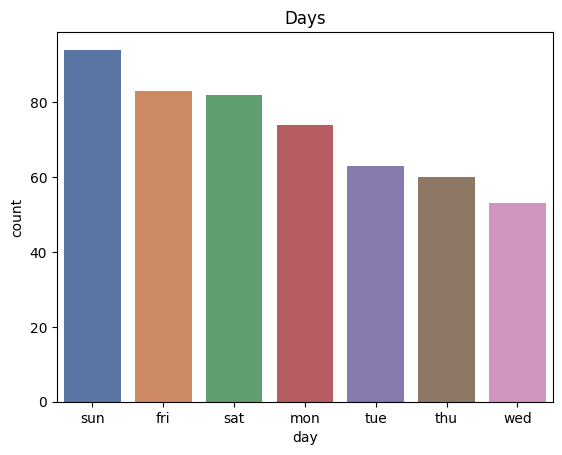

In [32]:
#Bar plot for day feature
sns.countplot(x='day',data=forest,palette='deep',order=forest['day'].value_counts().index)
plt.title('Days')

Text(0.5, 1.0, 'Bar plot for size')

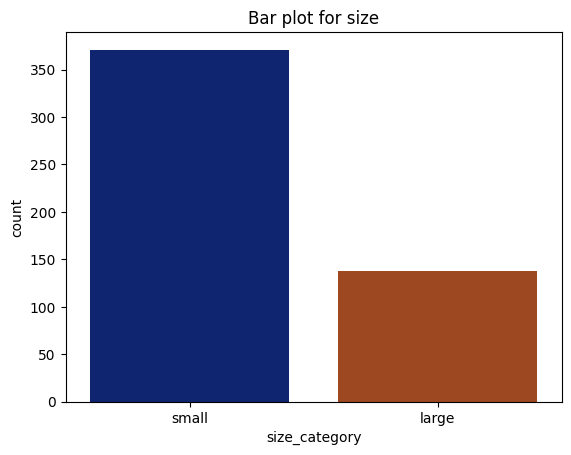

In [33]:
#BAR plot for size_category
sns.countplot(x='size_category',data=forest,palette='dark')
plt.title('Bar plot for size')

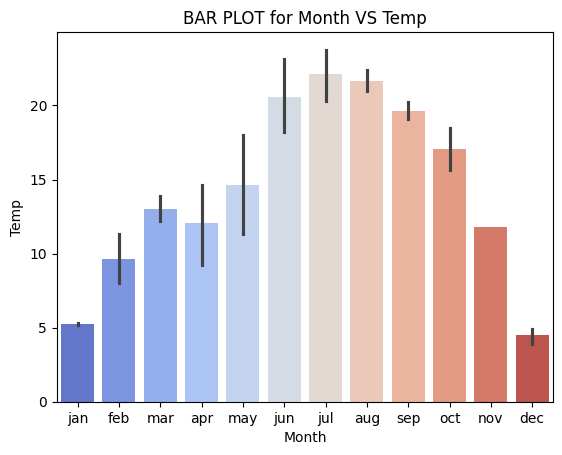

In [34]:
#BAR PLOT
sns.barplot(x='month',y='temp',data=forest,palette='coolwarm',order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('BAR PLOT for Month VS Temp')
plt.xlabel('Month')
plt.ylabel('Temp')
plt.show()

## **Label Encoding**

In [35]:
#we have perform encoding for convert object into string
#So label Encoder is use for encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
forest[['month','day','size_category']]=forest[['month','day','size_category']].apply(le.fit_transform)

In [38]:
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[509 rows x 31 columns]

# **Features Scaling**

In [39]:
#we have to perform feature scaling for reduce the scale

In [40]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [41]:
forest.iloc[:,:-1]=ms.fit_transform(forest.iloc[:,:-1])

In [42]:
forest.head()

month       day      FFMC       DMC        DC       ISI      temp  \
0  0.636364  0.000000  0.870968  0.086492  0.101325  0.090909  0.192926   
1  0.909091  0.833333  0.927742  0.118194  0.775419  0.119430  0.508039   
2  0.909091  0.333333  0.927742  0.146795  0.796294  0.119430  0.398714   
3  0.636364  0.000000  0.941935  0.110958  0.081623  0.160428  0.196141   
4  0.636364  0.500000  0.910968  0.172984  0.110590  0.171123  0.295820   

         RH      wind     rain  ...  monthfeb  monthjan  monthjul  monthjun  \
0  0.423529  0.700000  0.00000  ...       0.0       0.0       0.0       0.0   
1  0.211765  0.055556  0.00000  ...       0.0       0.0       0.0       0.0   
2  0.211765  0.100000  0.00000  ...       0.0       0.0       0.0       0.0   
3  0.964706  0.400000  0.03125  ...       0.0       0.0       0.0       0.0   
4  0.988235  0.155556  0.00000  ...       0.0       0.0       0.0       0.0   

   monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
0       1.0       0.0       0.0       0.0       0.0              1  
1       0.0       0.0       0.0       1.0       0.0              1  
2       0.0       0.0       0.0       1.0       0.0              1  
3       1.0       0.0       0.0       0.0       0.0              1  
4       1.0       0.0       0.0       0.0       0.0              1  

[5 rows x 31 columns]

# **Spliting into x and y**

In [43]:
#spliting into x and y
x=forest.iloc[:,:-1]#independent features
y=forest.iloc[:,-1]#dependent feature

#**Training and Testing**

In [44]:
#spliting into training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [46]:
xtrain

month       day      FFMC       DMC        DC       ISI      temp  \
358  1.000000  0.000000  0.952258  0.416609  0.916852  0.181818  0.562701   
12   0.090909  0.000000  0.578065  0.240179  0.770963  0.014260  0.475884   
98   0.090909  0.500000  0.938065  0.486906  0.696024  0.188948  0.302251   
132  0.636364  0.500000  0.910968  0.172984  0.110590  0.171123  0.270096   
485  0.090909  0.166667  0.984516  0.463129  0.690043  0.379679  0.913183   
..        ...       ...       ...       ...       ...       ...       ...   
324  1.000000  0.666667  0.895484  0.179876  0.843204  0.096257  0.369775   
15   1.000000  0.000000  0.962581  0.482771  0.827958  0.247772  0.665595   
490  0.090909  1.000000  0.985806  0.483115  0.701184  0.315508  0.852090   
127  1.000000  0.000000  0.965161  0.510682  0.845198  0.144385  0.482315   
268  0.090909  0.833333  0.947097  0.522054  0.762636  0.254902  0.604502   

           RH      wind  rain  ...  monthdec  monthfeb  monthjan  monthjul  \
358  0.282353  0.255556   0.0  ...       0.0       0.0       0.0       0.0   
12   0.670588  0.700000   0.0  ...       0.0       0.0       0.0       0.0   
98   0.847059  0.455556   0.0  ...       0.0       0.0       0.0       0.0   
132  0.364706  0.500000   0.0  ...       0.0       0.0       0.0       0.0   
485  0.152941  0.355556   0.0  ...       0.0       0.0       0.0       0.0   
..        ...       ...   ...  ...       ...       ...       ...       ...   
324  0.482353  0.155556   0.0  ...       0.0       0.0       0.0       0.0   
15   0.341176  0.555556   0.0  ...       0.0       0.0       0.0       0.0   
490  0.211765  0.400000   0.0  ...       0.0       0.0       0.0       0.0   
127  0.329412  0.300000   0.0  ...       0.0       0.0       0.0       0.0   
268  0.200000  0.300000   0.0  ...       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
358       0.0       0.0       0.0       0.0       0.0       1.0  
12        0.0       0.0       0.0       0.0       0.0       0.0  
98        0.0       0.0       0.0       0.0       0.0       0.0  
132       0.0       1.0       0.0       0.0       0.0       0.0  
485       0.0       0.0       0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...       ...       ...  
324       0.0       0.0       0.0       0.0       0.0       1.0  
15        0.0       0.0       0.0       0.0       0.0       1.0  
490       0.0       0.0       0.0       0.0       0.0       0.0  
127       0.0       0.0       0.0       0.0       0.0       1.0  
268       0.0       0.0       0.0       0.0       0.0       0.0  

[356 rows x 30 columns]

In [47]:
xtest

month       day      FFMC       DMC        DC       ISI      temp  \
313  1.000000  1.000000  0.953548  0.393866  0.902076  0.156863  0.710611   
159  1.000000  0.000000  0.950968  0.402481  0.774129  0.217469  0.540193   
465  0.272727  0.333333  0.784516  0.008615  0.008678  0.032086  0.077170   
43   1.000000  0.333333  0.952258  0.299449  0.810015  0.126560  0.559486   
183  0.909091  0.166667  0.941935  0.163336  0.807083  0.197861  0.469453   
..        ...       ...       ...       ...       ...       ...       ...   
128  0.909091  1.000000  0.938065  0.126809  0.780931  0.092692  0.440514   
248  0.090909  1.000000  0.960000  0.538249  0.772605  0.240642  0.852090   
57   0.909091  0.500000  0.953548  0.156444  0.802041  0.156863  0.372990   
37   0.909091  0.000000  0.920000  0.139214  0.791251  0.155080  0.292605   
67   1.000000  0.000000  0.950968  0.402481  0.774129  0.217469  0.559486   

           RH      wind  rain  ...  monthdec  monthfeb  monthjan  monthjul  \
313  0.141176  0.500000   0.0  ...       0.0       0.0       0.0       0.0   
159  0.223529  0.600000   0.0  ...       0.0       0.0       0.0       0.0   
465  0.517647  0.055556   0.0  ...       0.0       1.0       0.0       0.0   
43   0.388235  0.255556   0.0  ...       0.0       0.0       0.0       0.0   
183  0.352941  0.455556   0.0  ...       0.0       0.0       0.0       0.0   
..        ...       ...   ...  ...       ...       ...       ...       ...   
128  0.364706  0.355556   0.0  ...       0.0       0.0       0.0       0.0   
248  0.152941  0.255556   0.0  ...       0.0       0.0       0.0       0.0   
57   0.411765  0.255556   0.0  ...       0.0       0.0       0.0       0.0   
37   0.529412  0.555556   0.0  ...       0.0       0.0       0.0       0.0   
67   0.211765  0.555556   0.0  ...       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
313       0.0       0.0       0.0       0.0       0.0       1.0  
159       0.0       0.0       0.0       0.0       0.0       1.0  
465       0.0       0.0       0.0       0.0       0.0       0.0  
43        0.0       0.0       0.0       0.0       0.0       1.0  
183       0.0       0.0       0.0       0.0       1.0       0.0  
..        ...       ...       ...       ...       ...       ...  
128       0.0       0.0       0.0       0.0       1.0       0.0  
248       0.0       0.0       0.0       0.0       0.0       0.0  
57        0.0       0.0       0.0       0.0       1.0       0.0  
37        0.0       0.0       0.0       0.0       1.0       0.0  
67        0.0       0.0       0.0       0.0       0.0       1.0  

[153 rows x 30 columns]

In [48]:
ytrain

358    1
12     1
98     1
132    1
485    1
      ..
324    1
15     1
490    1
127    1
268    1
Name: size_category, Length: 356, dtype: int64

In [49]:
ytest

313    1
159    1
465    0
43     1
183    0
      ..
128    1
248    1
57     1
37     1
67     1
Name: size_category, Length: 153, dtype: int64

In [50]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(356, 30)
(356,)
(153, 30)
(153,)


# **Support Vector Machines Model Building**

In [51]:
from sklearn.svm import SVC
model=SVC()

# **1.kernel=linear**

In [52]:
#train and test
model1=SVC(kernel='linear',C=15,gamma=1)
model1.fit(xtrain,ytrain)
ypred1=model1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        44
           1       0.77      1.00      0.87       109

    accuracy                           0.78       153
   macro avg       0.88      0.62      0.63       153
weighted avg       0.83      0.78      0.73       153



In [53]:
confusion_matrix(ytest,ypred1)

array([[ 11,  33],
       [  0, 109]])

In [54]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred1),2))

Accuracy= 0.78


In [55]:
#Accuracy=78%

In [56]:
#cross validation
from sklearn.model_selection import KFold,cross_val_score

In [57]:
k=KFold(n_splits=10,shuffle=True,random_state=25)
res1=cross_val_score(model1,x,y,cv=k)
print(res1)
print('Accuracy=',res1.mean())

[0.80392157 0.84313725 0.84313725 0.78431373 0.78431373 0.80392157
 0.90196078 0.76470588 0.76470588 0.74      ]
Accuracy= 0.8034117647058823


In [58]:
#Accuracy=80%

**Accuracy is 80%**

# **2.kernal=rbf**

In [59]:
#train and test
model2=SVC(kernel='rbf',C=20,gamma=0.01)
model2.fit(xtrain,ytrain)
ypred2=model2.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        44
           1       0.73      1.00      0.84       109

    accuracy                           0.74       153
   macro avg       0.87      0.55      0.51       153
weighted avg       0.81      0.74      0.65       153



In [60]:
confusion_matrix(ytest,ypred2)

array([[  4,  40],
       [  0, 109]])

In [61]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred2),2))

Accuracy= 0.74


In [62]:
#Accuracy=74%

In [63]:
#cross validation
res2=cross_val_score(model2,x,y,cv=k)
print(res2)
print('Accuracy=',res2.mean())

[0.78431373 0.82352941 0.7254902  0.70588235 0.70588235 0.78431373
 0.78431373 0.7254902  0.70588235 0.72      ]
Accuracy= 0.7465098039215686


In [64]:
#Accuracy=74%

**Accuracy is 74%**

# **3.kernal=poly**

In [65]:
#train test
model3=SVC(kernel='poly',C=15,gamma=1)
model3.fit(xtrain,ytrain)
ypred3=model3.predict(xtest)
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        44
           1       0.82      0.90      0.86       109

    accuracy                           0.79       153
   macro avg       0.75      0.71      0.72       153
weighted avg       0.78      0.79      0.78       153



In [66]:
confusion_matrix(ytest,ypred3)

array([[23, 21],
       [11, 98]])

In [67]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred3),2))

Accuracy= 0.79


In [68]:
#Accuracy=79%

In [69]:
#cross validation
res3=cross_val_score(model3,x,y,cv=k)
print(res3)
print('Accuracy=',np.round(res3.mean(),2))

[0.82352941 0.8627451  0.76470588 0.82352941 0.74509804 0.80392157
 0.88235294 0.88235294 0.7254902  0.8       ]
Accuracy= 0.81


In [70]:
#Accuracy=81%

**Accuracy is 81%**

# **4.kernal=sigmoid**

In [71]:
#train and test
model4=SVC(kernel='sigmoid',C=15,gamma=0.01,degree=3)
model4.fit(xtrain,ytrain)
ypred4=model4.predict(xtest)
print(classification_report(ytest,ypred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.71      1.00      0.83       109

    accuracy                           0.71       153
   macro avg       0.36      0.50      0.42       153
weighted avg       0.51      0.71      0.59       153



In [72]:
confusion_matrix(ytest,ypred4)

array([[  0,  44],
       [  0, 109]])

In [73]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred4),2))

Accuracy= 0.71


In [74]:
#Accuracy=71%

In [75]:
#cross validation
res4=cross_val_score(model4,x,y,cv=k)
print(res4)
print('Accuracy=',res4.mean())

[0.74509804 0.80392157 0.7254902  0.70588235 0.70588235 0.78431373
 0.78431373 0.7254902  0.64705882 0.72      ]
Accuracy= 0.7347450980392157


In [76]:
#Accuracy=73%

**Accuracy is 73%**

In [77]:
#Best Model with good accuracy is polynomial model with score 81%

**Best Model with good accuracy is polynomial model with score 81%**

# **Poly Model has good accuracy**

# **Plot for poly model**

In [78]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [79]:
pca=PCA(n_components=2)
xm=pca.fit_transform(xtrain)
ym=ytrain.to_numpy()
mm=model3.fit(xm,ym)

<Axes: >

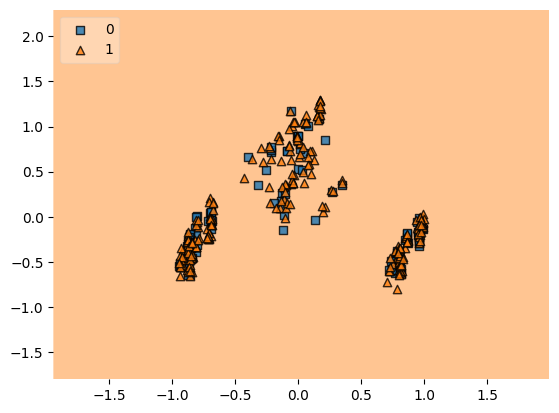

In [80]:
plot_decision_regions(xm,ym,mm,legend=2)

# **Grid Search CV**

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
#kernal=linear
param1=[{'kernel':['linear'],'C':[0.01,0.1,1,5,12,15,25],'gamma':[0.0001,0.001,0.01,0.1,1,10]}]
linear=SVC()
grid1=GridSearchCV(estimator=linear,param_grid=param1,cv=10)
grid1.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 12, 15, 25],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear']}])

In [83]:
print(grid1.best_score_)
print(grid1.best_params_)

0.8151587301587302
{'C': 25, 'gamma': 0.0001, 'kernel': 'linear'}


In [84]:
#Accuracy=82%

**Accuracy is 82%**

In [85]:
#kernal=rbf
param2=[{'kernel':['rbf'],'C':[0.01,0.1,1,5,12,15,50],'gamma':[0.0001,0.001,0.01,0.1,1,10]}]
rbf=SVC()
grid2=GridSearchCV(estimator=rbf,param_grid=param2,cv=10)
grid2.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 12, 15, 50],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}])

In [86]:
print(grid2.best_score_)
print(grid2.best_params_)

0.7501587301587301
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [87]:
#Accuracy=75%

**Accuracy is 75%**

In [88]:
#kernal=poly
param3=[{'kernel':['poly'],'C':[0.01,0.1,1,5,12,15,50],'gamma':[0.0001,0.001,0.01,0.1,1,10]}]
poly=SVC()
grid3=GridSearchCV(estimator=poly,param_grid=param3,cv=10)
grid3.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 12, 15, 50],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['poly']}])

In [89]:
print(grid3.best_score_)
print(grid3.best_params_)

0.8456349206349205
{'C': 1, 'gamma': 10, 'kernel': 'poly'}


In [90]:
#Accuracy=85%

**Accuracy is 85%**

In [91]:
#kernal=sigmoid
param4=[{'kernel':['sigmoid'],'C':[0.01,0.1,1,5,12,15,50],'gamma':[0.0001,0.001,0.01,0.1,1,10]}]
sigmoid=SVC()
grid4=GridSearchCV(estimator=sigmoid,param_grid=param4,cv=10)
grid4.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 12, 15, 50],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['sigmoid']}])

In [92]:
print(grid4.best_score_)
print(grid4.best_params_)

0.7501587301587301
{'C': 50, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [93]:
#Accuracy = 75%

**Accuracy is 75%**

In [94]:
#So best model with good accuracy in GridSearchCV is  kernel 'poly' and accuracy score is 85%

# **Conclusion**

In [95]:
#So best model with good accuracy in GridSearchCV is  kernel 'poly' and accuracy score is 85%

***Polynomial model has good accuracy score for both  Model Building and  GridSearchCV***

In [96]:
#completed

# **completed**